# Machine Learning Online Class

## Exercise 1: Linear regression with multiple variables
```
%  Instructions
%  ------------
% 
%  This file contains code that helps you get started on the
%  linear regression exercise. 
%
%  You will need to complete the following functions in this 
%  exericse:
%
%     warmUpExercise.m
%     plotData.m
%     gradientDescent.m
%     computeCost.m
%     gradientDescentMulti.m
%     computeCostMulti.m
%     featureNormalize.m
%     normalEqn.m
%
%  For this part of the exercise, you will need to change some
%  parts of the code below for various experiments (e.g., changing
%  learning rates).
%

```

## ================ Part 1: Feature Normalization ================

### Matlab code:

```
%% Clear and Close Figures
clear ; close all; clc

fprintf('Loading data ...\n');

%% Load Data
data = load('ex1data2.txt');
X = data(:, 1:2);
y = data(:, 3);
m = length(y);

% Print out some data points
fprintf('First 10 examples from the dataset: \n');
fprintf(' x = [%.0f %.0f], y = %.0f \n', [X(1:10,:) y(1:10,:)]');

fprintf('Program paused. Press enter to continue.\n');
pause;

% Scale features and set them to zero mean
fprintf('Normalizing Features ...\n');

[X mu sigma] = featureNormalize(X);

% Add intercept term to X
X = [ones(m, 1) X];
```

In [1]:
import numpy as np
import pandas as pd
from computeCostMulti import computeCostMulti
from featureNormalize import featureNormalize

In [2]:
print('Loading data ...\n');

# Load Data
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:,0:2]
y = data[:,2]
m = len(y)

# Print out some data points
print('First 10 examples from the dataset: \n')
print(data[:10])

# Scale features and set them to zero mean
print('Normalizing Features ...\n')

X_norm, mu, sigma = featureNormalize(X)

# Add intercept term to X
#X = np.c_[np.ones((X.shape[0])), X_norm] # Add a column of ones to x
X = np.concatenate((np.ones((X.shape[0],1)), X_norm), axis=1)

Loading data ...

First 10 examples from the dataset: 

[[2.10400e+03 3.00000e+00 3.99900e+05]
 [1.60000e+03 3.00000e+00 3.29900e+05]
 [2.40000e+03 3.00000e+00 3.69000e+05]
 [1.41600e+03 2.00000e+00 2.32000e+05]
 [3.00000e+03 4.00000e+00 5.39900e+05]
 [1.98500e+03 4.00000e+00 2.99900e+05]
 [1.53400e+03 3.00000e+00 3.14900e+05]
 [1.42700e+03 3.00000e+00 1.98999e+05]
 [1.38000e+03 3.00000e+00 2.12000e+05]
 [1.49400e+03 3.00000e+00 2.42500e+05]]
Normalizing Features ...



##  ================ Part 2: Gradient Descent ================

### Instructions:
```
% ====================== YOUR CODE HERE ======================
% Instructions: We have provided you with the following starter
%               code that runs gradient descent with a particular
%               learning rate (alpha). 
%
%               Your task is to first make sure that your functions - 
%               computeCost and gradientDescent already work with 
%               this starter code and support multiple variables.
%
%               After that, try running gradient descent with 
%               different values of alpha and see which one gives
%               you the best result.
%
%               Finally, you should complete the code at the end
%               to predict the price of a 1650 sq-ft, 3 br house.
%
% Hint: By using the 'hold on' command, you can plot multiple
%       graphs on the same figure.
%
% Hint: At prediction, make sure you do the same feature normalization.
%

```

```
fprintf('Running gradient descent ...\n');

% Choose some alpha value
alpha = 0.35;
num_iters = 50;

% Init Theta and Run Gradient Descent 
theta = zeros(3, 1);
[theta, J_history] = gradientDescentMulti(X, y, theta, alpha, num_iters);

% Plot the convergence graph
figure;
plot(1:numel(J_history), J_history, '-b', 'LineWidth', 2);
xlabel('Number of iterations');
ylabel('Cost J');

% Display gradient descent's result
fprintf('Theta computed from gradient descent: \n');
fprintf(' %f \n', theta);
fprintf('\n');
```

In [3]:
from gradientDescentMulti import gradientDescentMulti
import matplotlib.pyplot as plt

Running gradient descent ...

Theta computed from gradient descent:
[[340412.65942392]
 [109434.25239256]
 [ -6564.81077708]]


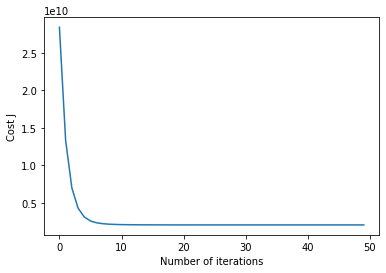

In [4]:
print('Running gradient descent ...\n')

# Choose some alpha value
alpha = 0.35
num_iters = 50

# Init Theta and Run Gradient Descent 
theta = np.zeros((3, 1))
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Plot the convergence graph
#figure;
plt.plot(np.arange(J_history.shape[0]), J_history )
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

# Display gradient descent's result
print('Theta computed from gradient descent:')
print(theta)

```
% Estimate the price of a 1650 sq-ft, 3 br house
% ====================== YOUR CODE HERE ======================
% Recall that the first column of X is all-ones. Thus, it does
% not need to be normalized.
price = 0; % You should change this
x_pre = ([1650, 3] - mu) ./sigma;
price = [1, x_pre] * theta;


% ============================================================

fprintf(['Predicted price of a 1650 sq-ft, 3 br house ' ...
         '(using gradient descent):\n $%f\n'], price);

fprintf('Program paused. Press enter to continue.\n');
```

In [6]:
price = 0 # You should change this
x_pre = (np.array([1650, 3]) - mu) / sigma
x_pre = np.concatenate((np.ones((1,1)), x_pre.reshape(1,-1)), axis = 1)
price = x_pre.dot(theta)


# ============================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):', price[0,0])

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): 293084.44321077626


## ================ Part 3: Normal Equations ================

### Intstructions:
```
% ====================== YOUR CODE HERE ======================
% Instructions: The following code computes the closed form 
%               solution for linear regression using the normal
%               equations. You should complete the code in 
%               normalEqn.m
%
%               After doing so, you should complete this code 
%               to predict the price of a 1650 sq-ft, 3 br house.
```

### Matlab code :
```
%% Load Data
data = csvread('ex1data2.txt');
X = data(:, 1:2);
y = data(:, 3);
m = length(y);

% Add intercept term to X
X = [ones(m, 1) X];

% Calculate the parameters from the normal equation
theta = normalEqn(X, y);

% Display normal equation's result
fprintf('Theta computed from the normal equations: \n');
fprintf(' %f \n', theta);
fprintf('\n');


% Estimate the price of a 1650 sq-ft, 3 br house
% ====================== YOUR CODE HERE ======================
price = 0; % You should change this
price = [1,1650,3]*theta;

% ============================================================

fprintf(['Predicted price of a 1650 sq-ft, 3 br house ' ...
         '(using normal equations):\n $%f\n'], price);

```

In [7]:
from normalEqn import normalEqn

In [11]:
# Load Data
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:,0:2]
y = data[:,2]
m = len(y)

# Add intercept term to X
X = np.concatenate((np.ones((m, 1)), X), axis=1)

# Calculate the parameters from the normal equation
theta = normalEqn(X, y)

# Display normal equation's result
print('Theta computed from the normal equations: \n')
print (theta)

Theta computed from the normal equations: 

[89597.9095428    139.21067402 -8738.01911233]


In [12]:
# Estimate the price of a 1650 sq-ft, 3 br house
# ====================== YOUR CODE HERE ======================
price = 0 # % You should change this
price = np.array([1,1650,3]).dot(theta)

# ============================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations):', price)

Predicted price of a 1650 sq-ft, 3 br house (using normal equations): 293081.4643348957
